In [50]:
import os

os.environ['JAX_ENABLE_X64'] = '1'

import keras
from keras import layers
from keras import ops

import random

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Rutas a las carpetas de imágenes y al archivo CSV de anotaciones
path = '../images_v1/images_v1/'
path_annotations = '../annotations_v1.csv'

# Cargar el archivo CSV con las coordenadas de las cajas
df = pd.read_csv(path_annotations)

df.shape

df.head()

,ImageId,Width,Height,Xmin,Ymin,Xmax,Ymax
0,000155de5.jpg,768,768,344,465,447,500
1,000194a2d.jpg,768,768,469,287,491,306
2,000194a2d.jpg,768,768,67,377,84,385
3,000194a2d.jpg,768,768,258,174,305,184
4,000194a2d.jpg,768,768,72,386,78,386


(array([3740.,    0.,    0., 1444.,    0.,    0.,  801.,    0.,    0.,
         457.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

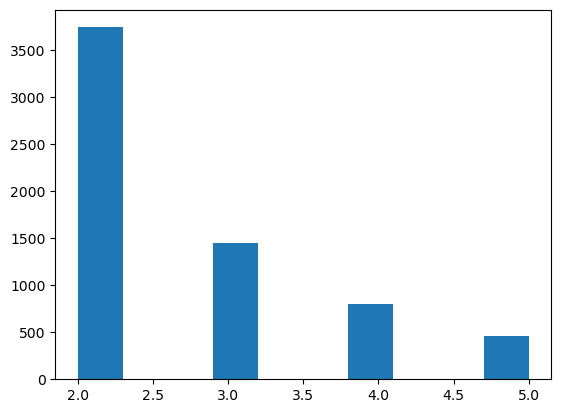

In [2]:
labels = df['ImageId'].value_counts()
# Filtrar las imágenes que tienen entre 2 barcos y 5 barcos
labels = labels[(labels >= 2) & (labels <= 5)]

plt.hist(labels)

In [3]:
labels = pd.get_dummies(labels)

labels.head()

,2,3,4,5
ImageId,,,,
41e2c961c.jpg,False,False,False,True
23d855017.jpg,False,False,False,True
5a0487af5.jpg,False,False,False,True
0041d7084.jpg,False,False,False,True
41b53dfdb.jpg,False,False,False,True


In [4]:
y_train = np.array(labels.values)

y_train.shape

(6442, 4)

In [5]:
images_name = labels.index

In [6]:
images = []

for name in images_name:
    image_path = os.path.join(path, name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (100, 100))
    image = image/255.
    images.append(image)

x_train = np.array(images)
x_train = np.reshape(x_train, x_train.shape + (1,))

x_train.shape, y_train.shape

((6442, 100, 100, 1), (6442, 4))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5153, 100, 100, 1), (1289, 100, 100, 1), (5153, 4), (1289, 4))

In [8]:
num_classes = len(labels.columns)

input_shape = x_train.shape[1:]

num_classes, input_shape

(4, (100, 100, 1))

In [11]:
def build_model():
    model = keras.Sequential()
    
    model.add(layers.Input(shape=input_shape))
     
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [12]:
model = build_model()

model.fit(x_train, y_train, batch_size=250, epochs=100, validation_split=0.2)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 401ms/step - accuracy: 0.5119 - loss: 1.2973 - val_accuracy: 0.5783 - val_loss: 1.2620
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.5843 - loss: 1.1527 - val_accuracy: 0.5783 - val_loss: 1.2037
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.5880 - loss: 1.1145 - val_accuracy: 0.5783 - val_loss: 1.1750
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.5910 - loss: 1.1030 - val_accuracy: 0.5783 - val_loss: 1.1793
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.5886 - loss: 1.0924 - val_accuracy: 0.5783 - val_loss: 1.1646
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.5793 - loss: 1.1190 - val_accuracy: 0.5783 - val_loss: 1.1698
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.5832 - loss: 1.0946 - val_accuracy: 0.5783 - val_loss: 1.1607
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.5792 - loss: 1.1100 - val_accu

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 515ms/step - accuracy: 0.5958 - loss: 1.0168 - val_accuracy: 0.5783 - val_loss: 1.1156
Epoch 52/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 516ms/step - accuracy: 0.5740 - loss: 1.0359 - val_accuracy: 0.5789 - val_loss: 1.1325
Epoch 53/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 543ms/step - accuracy: 0.5845 - loss: 1.0106 - val_accuracy: 0.5789 - val_loss: 1.1275
Epoch 54/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 513ms/step - accuracy: 0.5872 - loss: 1.0115 - val_accuracy: 0.5776 - val_loss: 1.1330
Epoch 55/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 545ms/step - accuracy: 0.5774 - loss: 1.0196 - val_accuracy: 0.5776 - val_loss: 1.1318
Epoch 56/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 530ms/step - accuracy: 0.5894 - loss: 1.0048 - val_accuracy: 0.5776 - val_loss: 1.1313
Epoch 57/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 580ms/step - accuracy: 0.5834 - loss: 0.9967 - val_accuracy: 0.5789 - val_loss: 1.1365
Epoch 58/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 526ms/step - accuracy: 0.6032 - loss: 0.9775 - val_accuracy:

In [15]:
y_pred = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


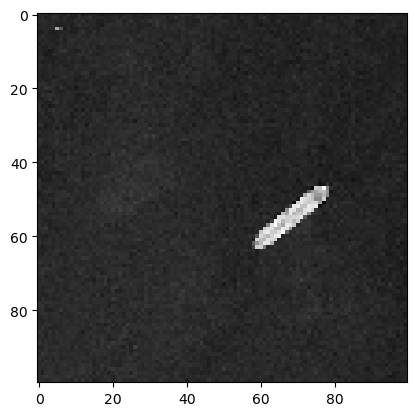

In [35]:
plt.imshow(x_test[8, :, :, 0], cmap='gray')

In [38]:
y_pred[8]

array([0.82003653, 0.08799773, 0.06529963, 0.02666612], dtype=float32)

In [39]:
y_test[8]

array([ True, False, False, False])

<BarContainer object of 4 artists>

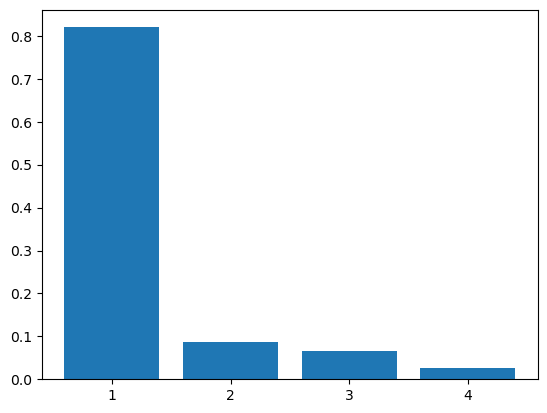

In [40]:
plt.bar(['1', '2', '3', '4'], y_pred[8])

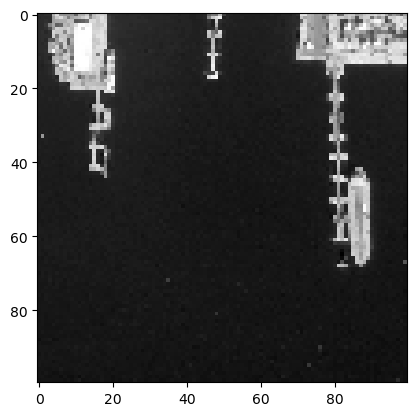

In [45]:
plt.imshow(x_test[0, :, :, 0], cmap='gray')

In [46]:
y_pred[0]

array([0.82003653, 0.08799773, 0.06529963, 0.02666612], dtype=float32)

In [47]:
y_test[0]

array([ True, False, False, False])

<BarContainer object of 4 artists>

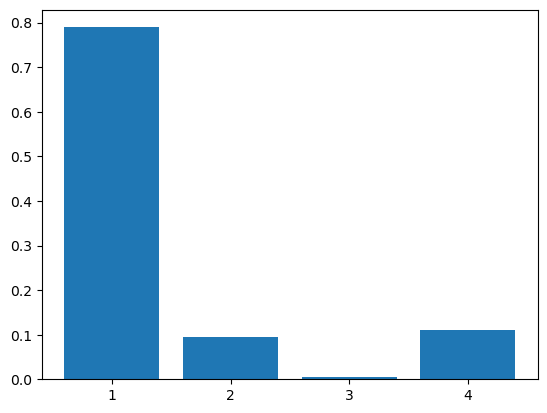

In [48]:
plt.bar(['1', '2', '3', '4'], y_pred[0])

In [22]:
pred = np.argmax(y_pred, axis=1)

pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
test = np.argmax(y_test, axis=1)

test

array([3, 0, 0, ..., 0, 0, 2], dtype=int64)

In [51]:
accuracy_score(test, pred)

0.547711404189294

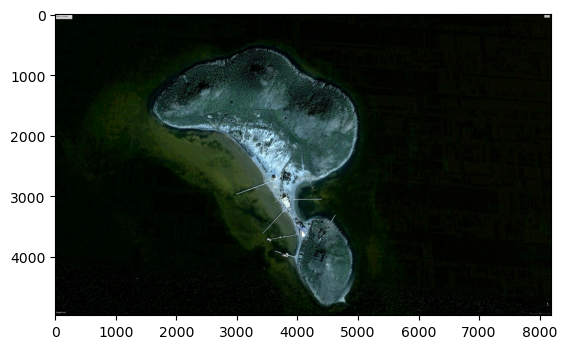

In [80]:
path = '../img_isla_perdiguera/'

name = '012004.jpg'

image_path = os.path.join(path, name)
image = cv2.imread(image_path)

plt.imshow(image)

In [81]:
image.shape

(4968, 8192, 3)

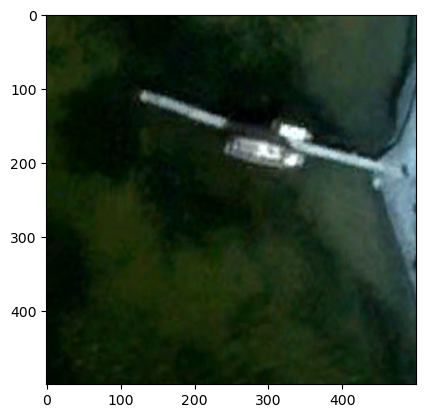

In [82]:
image = image[3800:4300, 3500:4000, :]

plt.imshow(image)

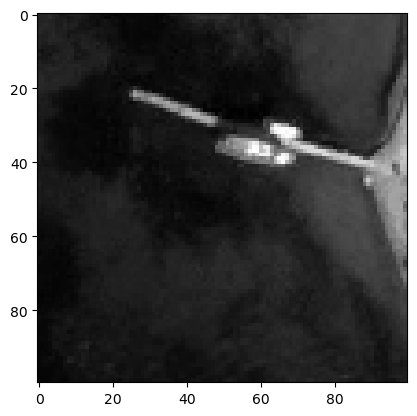

In [83]:
images = []

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (100, 100))
image = image/255.
images.append(image)

x_perdiguera = np.array(images)

plt.imshow(x_perdiguera[0], cmap='gray')

In [86]:
x_perdiguera = np.reshape(x_perdiguera, x_perdiguera.shape + (1,))

x_perdiguera.shape

(1, 100, 100, 1)

In [87]:
perdiguera_pred = model.predict(x_perdiguera)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [88]:
perdiguera_pred

array([[3.8331553e-01, 6.1668134e-01, 3.0285905e-06, 7.9762060e-08]],
      dtype=float32)

<BarContainer object of 4 artists>

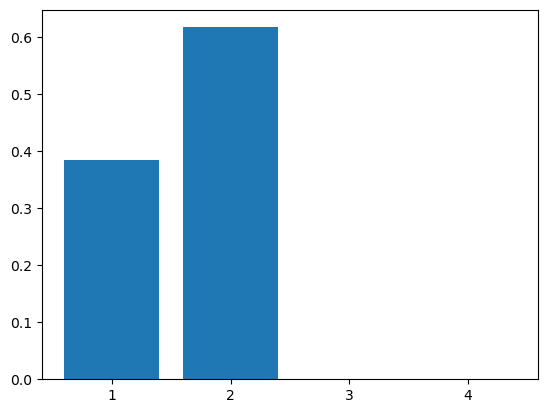

In [90]:
plt.bar(['1', '2', '3', '4'], perdiguera_pred[0])